<a href="https://colab.research.google.com/github/n9hquan/QR103/blob/main/WS_2.5_Normal_distribution_and_the_Central_Limit_Theorem_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will convince ourself that the Central limit theorem is true by look at the distribution of the sample mean in some examples.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

Let's read the file 'datareg.xlsx' that we used in previous worksheets. I uploaded the file to my Github account for easier importing.

In [2]:
data_url = "https://github.com/lhprime/MATH105/blob/main/datareg.xlsx?raw=true"
data = pd.read_excel(data_url)

In [28]:
data

,HHSEX,AGE,EDUC,INCOME,NETWORTH
0,1,54,11,20290.628707,-400.0
1,1,54,11,20290.628707,-400.0
2,1,54,11,20290.628707,-400.0
3,1,54,11,20290.628707,-400.0
4,1,54,11,20290.628707,-400.0
...,...,...,...,...,...
30070,1,76,13,38552.194543,-110400.0
30071,1,76,13,36523.131673,-101700.0
30072,1,76,13,35508.600237,-120600.0
30073,1,76,13,43624.851720,-130300.0


#Normal distribution fitting

The Normal distribution is quite simple and easy to be fitted to data. It only requires 2 parameters `loc` and `scale` and they are actually the mean and the standard deviation of the distribution. So if a data follows the normal distribution, we simply calculate the sample mean and sample standard deviation and feed the values to the parameters.

In this section we will try to fit the normal curve to the data 'INCOME'. First we look at the histogram.

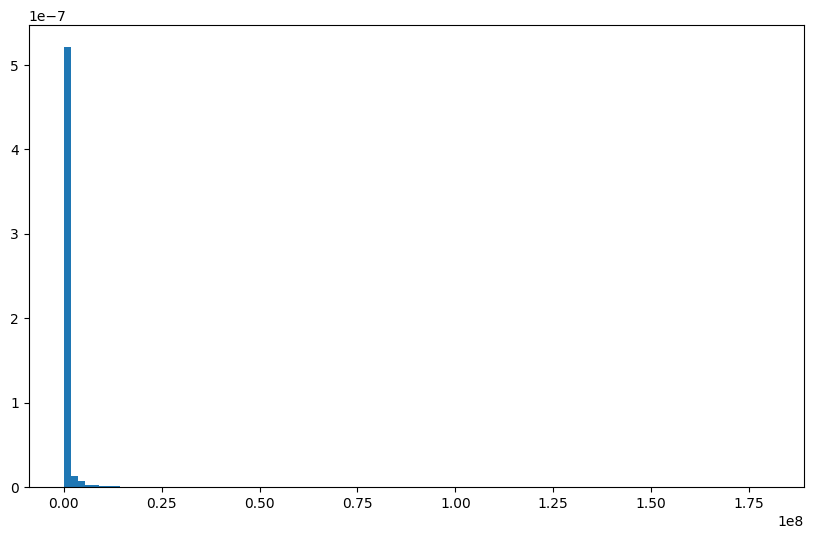

In [4]:
plt.figure(figsize=(10,6))
plt.hist(data.INCOME, bins = 100, density = True)
plt.show()

We can see that the histogram has a very long right tail and not  symmetric at all, so the normal distribution might be not suitble. To make sure we will check the boxplot

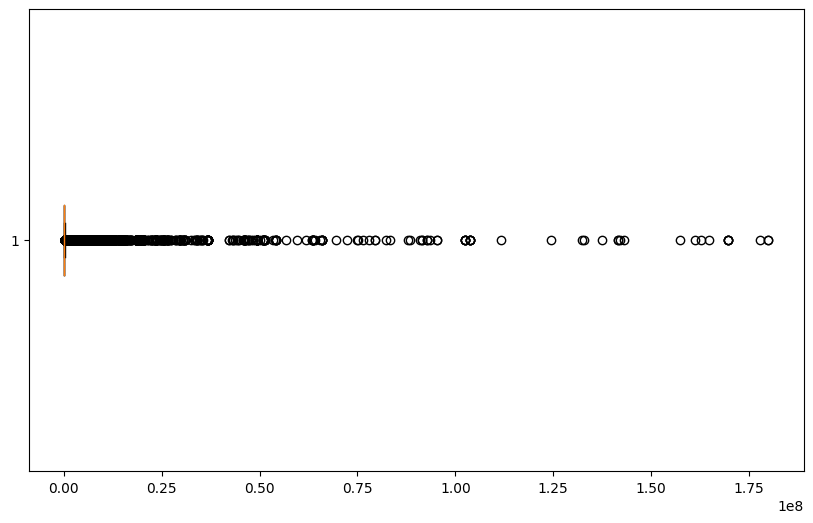

In [5]:
plt.figure(figsize=(10,6))
plt.boxplot(data.INCOME, vert = False)
plt.show()

Look at the boxplot and we can see many outliers on the right which confirm the long right tail. We will eliminate some of the outliers by using the IQR. Note that because of the long right tail, we need to set the coefficient of IQR in the upper wisher to be larger than 1.5 (here is 2.5)

In [6]:
q1, q3 = data.INCOME.quantile([0.25,0.75])
low_whisker = q1 - 1.5*(q3 - q1)
upp_whisker = q3 + 2.5*(q3 - q1)
INCOME = data.INCOME[(data.INCOME<=upp_whisker)&(data.INCOME>=low_whisker)]

The series `INCOME` now contains the clean data. We will look at the histogram one more time

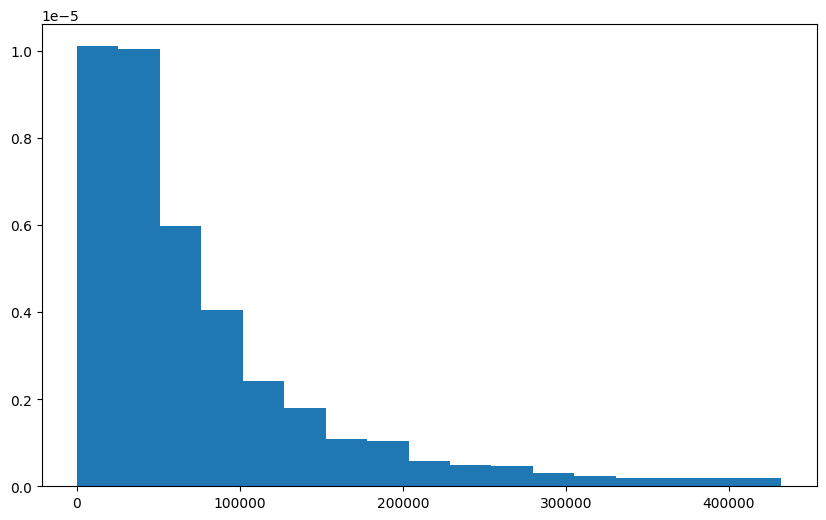

In [7]:
plt.figure(figsize=(10,6))
plt.hist(INCOME, bins = 17, density = True)
plt.show()

Althought the asymmetric shape suggests a not normal distribution, let's try to fit the normal distribution to the histogram to see how bad it is. We start by calculating the sample mean and standard deviation of `INCOME`

In [8]:
mean_INCOME = INCOME.mean()
std_INCOME = INCOME.std()

To draw the graph of the pdf, we need to generate a set of value for the x-axis. The function `np.linspace` will do the job (it is similar to `range` but can take float values). We then create a plot of `norm.pdf` using the x values `x_INCOME`.

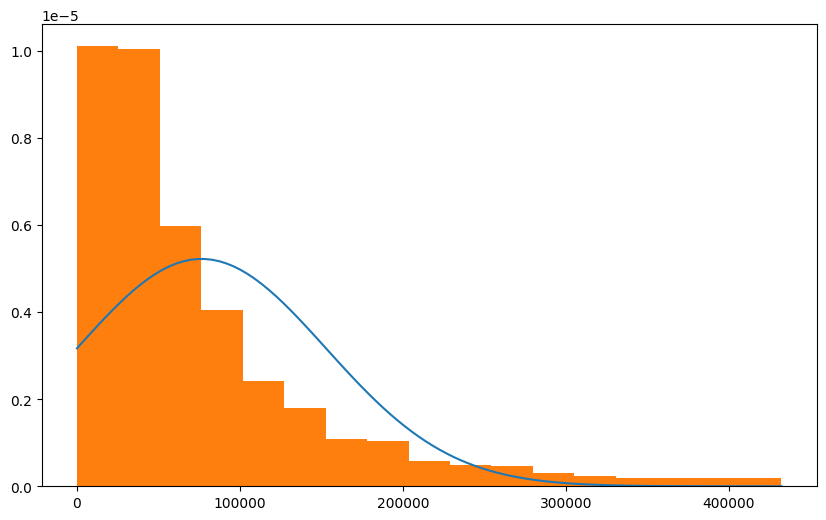

In [9]:
from scipy.stats import norm
x_INCOME = np.linspace(INCOME.min(), INCOME.max(), 100)
plt.figure(figsize=(10,6))
plt.plot(x_INCOME, norm.pdf(x_INCOME, mean_INCOME, std_INCOME))
plt.hist(INCOME, bins = 17, density = True)
plt.show()

#Central Limit Theorem

Now we clearly see that the Income data does not follow the normal distribution. However if the Central Limit Theorem is correct, then the sample mean should follow the normal distribution regardless of the main data. To see this effect, we will generate some random sample sets, calculate their means, and put together a new data set as follows: 

*We will take random samples of size 100 from the INCOME data. Each time we choose 100 INCOME values at random and calculate the sample mean. Repeat the process 1000 times and put all the 1000 sample means into a list, then convert the list into a data frame.*

In [10]:
sample_mean_list = []
for i in range(1000):
  sample_INCOME = INCOME.sample(n=100)
  sample_mean_list.append(sample_INCOME.mean())
df = pd.DataFrame(sample_mean_list, columns=['sample_mean'])

In [11]:
df

,sample_mean
0,84753.956109
1,70692.550415
2,67797.077699
3,78078.237811
4,80477.706109
...,...
995,75395.918149
996,72232.609134
997,90014.707414
998,77240.843564


Now we have a data frame `df` with a column `sample_mean`. Let's look at the boxplot of `df.sample_mean` and see if there is any outlier.

**Exercise**: Create a boxplot of `df.sample_mean`. If there is outlier, remove them by using the IQR. Assign the cleaned data to a series named `sample_mean`.

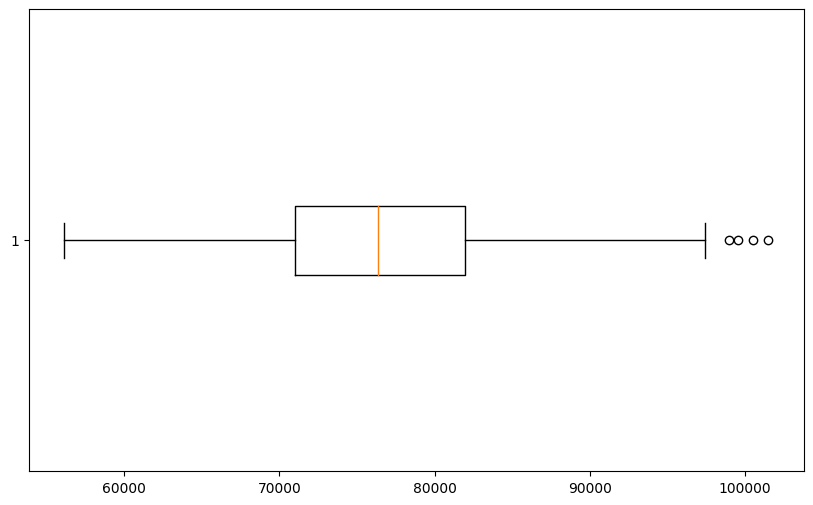

In [20]:
# Solution goes here
plt.figure(figsize=(10,6))
plt.boxplot(df.sample_mean, vert = False)
plt.show()

In [23]:
q1_sample, q3_sample = df.sample_mean.quantile([0.25,0.75])
low_whisker_sample = q1_sample - 1.5*(q3_sample - q1_sample)
upp_whisker_sample = q3_sample + 1.5*(q3_sample - q1_sample)
sample_mean = df.sample_mean[(df.sample_mean<=upp_whisker_sample)&(df.sample_mean>=low_whisker_sample)]
sample_mean

0      84753.956109
1      70692.550415
2      67797.077699
3      78078.237811
4      80477.706109
           ...     
995    75395.918149
996    72232.609134
997    90014.707414
998    77240.843564
999    83220.491845
Name: sample_mean, Length: 996, dtype: float64

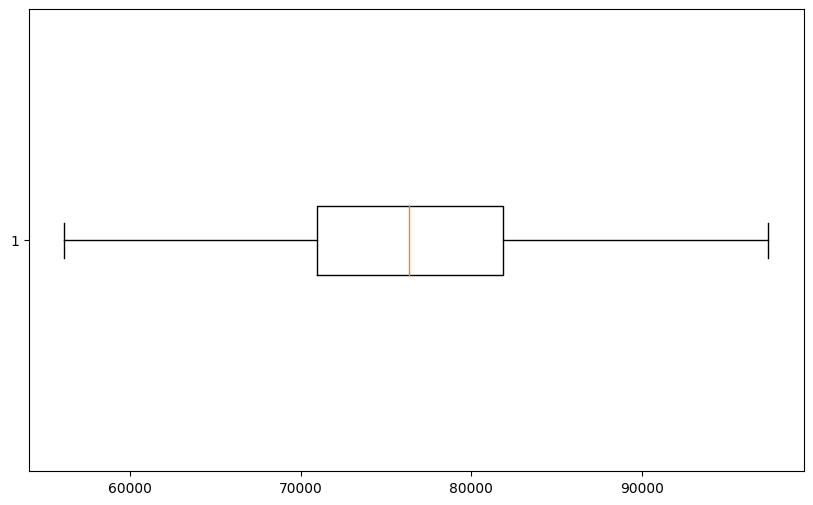

In [24]:
plt.figure(figsize=(10,6))
plt.boxplot(sample_mean, vert = False)
plt.show()

By the Central limit theorem, `sample_mean` should follow the normal distribution.

**Exercise**: Repeat the steps in previous section to fit a normal density curve to the histogram of `sample_mean`.

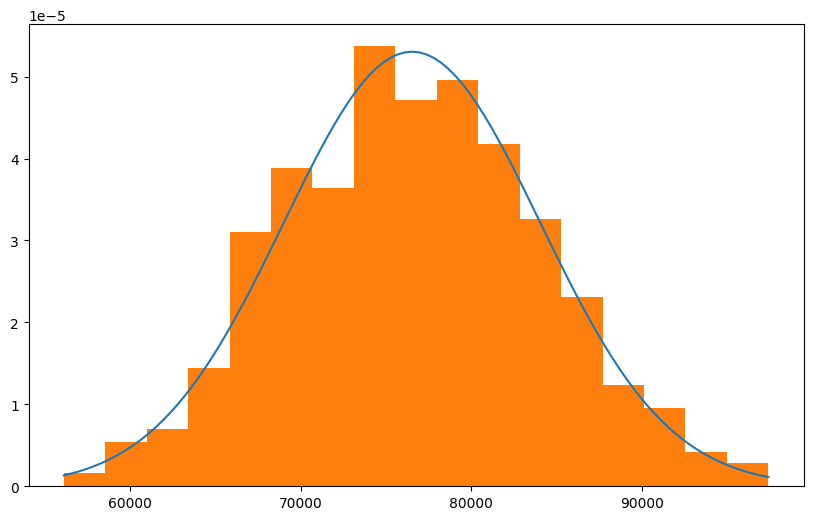

In [26]:
#Solution goes here
mean_sample = sample_mean.mean()
std_sample = sample_mean.std()
x_sample_mean = np.linspace(sample_mean.min(), sample_mean.max(), 100)
plt.figure(figsize=(10,6))
plt.plot(x_sample_mean, norm.pdf(x_sample_mean, mean_sample, std_sample))
plt.hist(sample_mean, bins = 17, density = True)
plt.show()

**Question**: Compare the fitted curves of `sample_mean` and `weight`. Do you think that the Central Limit Theorem is correct?

**Question**: Try increase/decrease the sample size `n` and describe the effect of `n` on the CLT.

**Exercise**: Use the same method to test the CLT using the `HHSEX` column. The values of this column are only '1' or '2', then obviously the distribution is very different from the normal distribution. Follow the steps:


*   Generate a data of sample means
*   Fit the normal distribution to the data
*   Does the distribution of sample mean look normal to you?



In [45]:
sample_mean_list_hhsex = []
for i in range(1000):
  sample_HHSEX = data.HHSEX.sample(n=100)
  sample_mean_list_hhsex.append(sample_HHSEX.mean())
df_hhsex = pd.DataFrame(sample_mean_list_hhsex, columns=['sample_mean_hhsex'])

In [46]:
df_hhsex

,sample_mean_hhsex
0,1.30
1,1.20
2,1.33
3,1.22
4,1.21
...,...
995,1.22
996,1.24
997,1.23
998,1.29


In [47]:
mean_hhsex = df_hhsex.mean()
std_hhsex = df_hhsex.std()

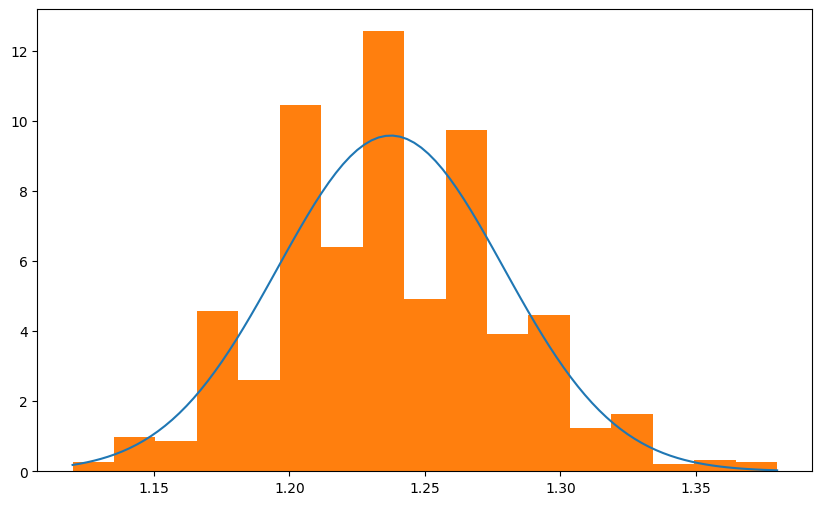

In [48]:
x_hhsex = np.linspace(df_hhsex.min(), df_hhsex.max(), 100)
plt.figure(figsize=(10,6))
plt.plot(x_hhsex, norm.pdf(x_hhsex, mean_hhsex, std_hhsex))
plt.hist(df_hhsex, bins = 17, density = True);
plt.show()